In [175]:
# housing market EDA

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

cv=5
target = "SalePrice_Log"
min_=0.4
drop=1

In [177]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [178]:
train.shape

(1460, 81)

In [179]:
test.shape

(1459, 80)

In [180]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [182]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [184]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [185]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


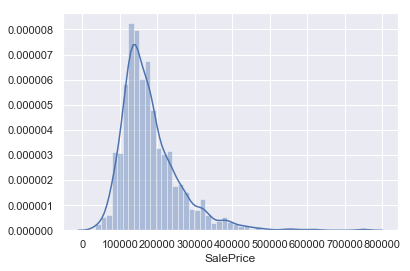

In [186]:
sns.distplot(train['SalePrice']);

In [187]:
train['SalePrice_Log']=np.log(train['SalePrice'])
train['GrLivArea_Log']=np.log(train['GrLivArea'])
train['LotArea_Log']=np.log(train['LotArea'])

test['GrLivArea_Log']=np.log(test['GrLivArea'])
test['LotArea_Log']=np.log(test['LotArea'])



C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


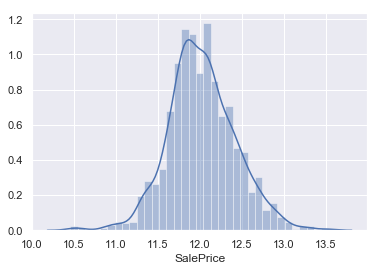

In [188]:
# clean up axis by using log of the same distribution plot shown above

sns.distplot(np.log(train['SalePrice']));

In [189]:
# numerical vs. categorical data

num = train.dtypes[train.dtypes != "object"].index
cat = train.dtypes[train.dtypes == "object"].index

print(len(num), " numerical features")
print(len(cat), " categorical features")

41  numerical features
43  categorical features


In [190]:
train[num].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_Log,GrLivArea_Log,LotArea_Log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,2,2008,208500,12.247694,7.444249,9.041922
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,5,2007,181500,12.109011,7.140453,9.169518
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,9,2008,223500,12.317167,7.487734,9.328123
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,2,2006,140000,11.849398,7.448334,9.164296
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,12,2008,250000,12.429216,7.695303,9.565214


In [191]:
train[cat].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [192]:
# ideally each categorical value can be one hot encoded for a completely flat data structure

# let's find and fill the missing data

In [193]:
total = train.isnull().sum().sort_values()
sum1 = train.isnull().sum()
count = train.isnull().count()
percent = (sum1/count)

In [194]:
missing = pd.concat([total, percent], axis=1,keys=['Total','Percent'])
missing.head()

C:\Users\ghani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Total,Percent
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
3SsnPorch,0,0.000000
Alley,1369,0.937671
BedroomAbvGr,0,0.000000


In [195]:
missing.sort_values('Total',inplace=True,ascending=False)
missing.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


In [196]:
missing

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageFinish,81,0.055479
GarageYrBlt,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479


In [197]:
# fill blanks with average value or 'none'

In [198]:
# a list of all the columns where a null value means something does not exist

In [199]:
fill_null_columns = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','Electrical','KitchenQual','SaleType','Functional','Exterior1st','Exterior2nd','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','MSZoning','Utilities']

for x in fill_null_columns:
    train[x].fillna('None',inplace=True)
    test[x].fillna('None',inplace=True)

In [200]:
total = train.isnull().sum().sort_values()
sum1 = train.isnull().sum()
count = train.isnull().count()
percent = (sum1/count)

In [201]:
missing = pd.concat([total, percent], axis=1,keys=['Total','Percent'])
missing.head()

C:\Users\ghani\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Total,Percent
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,0,0.0
BedroomAbvGr,0,0.0


In [202]:
missing.sort_values('Total',inplace=True,ascending=False)
missing.head()

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
LotShape,0,0.000000
MoSold,0,0.000000


In [203]:
# fill the remaining columns with average values

train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [204]:
total = train.isnull().sum().sort_values()
sum1 = train.isnull().sum()
count = train.isnull().count()
percent = (sum1/count)

missing = pd.concat([total, percent], axis=1,keys=['Total','Percent'])
missing.sort_values('Total',inplace=True,ascending=False)
missing.head()

C:\Users\ghani\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Total,Percent
1stFlrSF,0,0.0
LotShape,0,0.0
MoSold,0,0.0
MiscVal,0,0.0
MiscFeature,0,0.0


In [205]:
# how many null values in training set

train.isnull().sum().sum()

0

In [206]:
# how many null values in testing set

test.isnull().sum().sum()

0

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


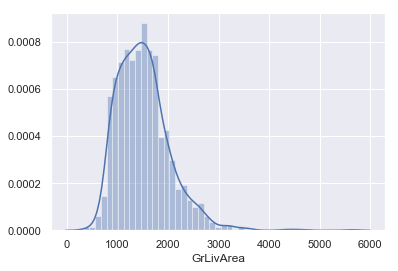

In [207]:
sns.distplot(train['GrLivArea']);

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


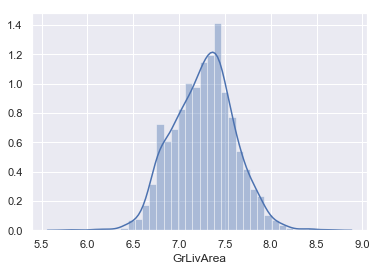

In [208]:
sns.distplot(np.log(train['GrLivArea']));

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


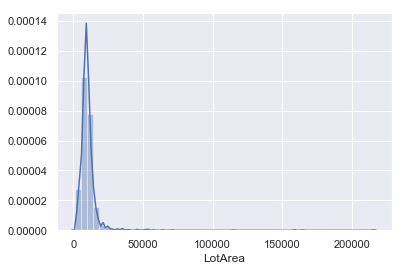

In [209]:
sns.distplot(train['LotArea']);

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


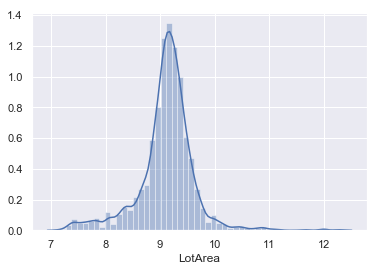

In [210]:
sns.distplot(np.log(train['LotArea']));

In [211]:
train.drop('SalePrice', axis= 1, inplace=True)
train.drop('GrLivArea', axis= 1, inplace=True)
train.drop('LotArea', axis= 1, inplace=True)

test.drop('GrLivArea',axis=1,inplace=True)
test.drop('LotArea',axis=1,inplace=True)

In [212]:
# plot of all numerical features and their correlation with SalePrice
# obviously do not plot SalePrice (or ID)

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyError: 'LotArea'

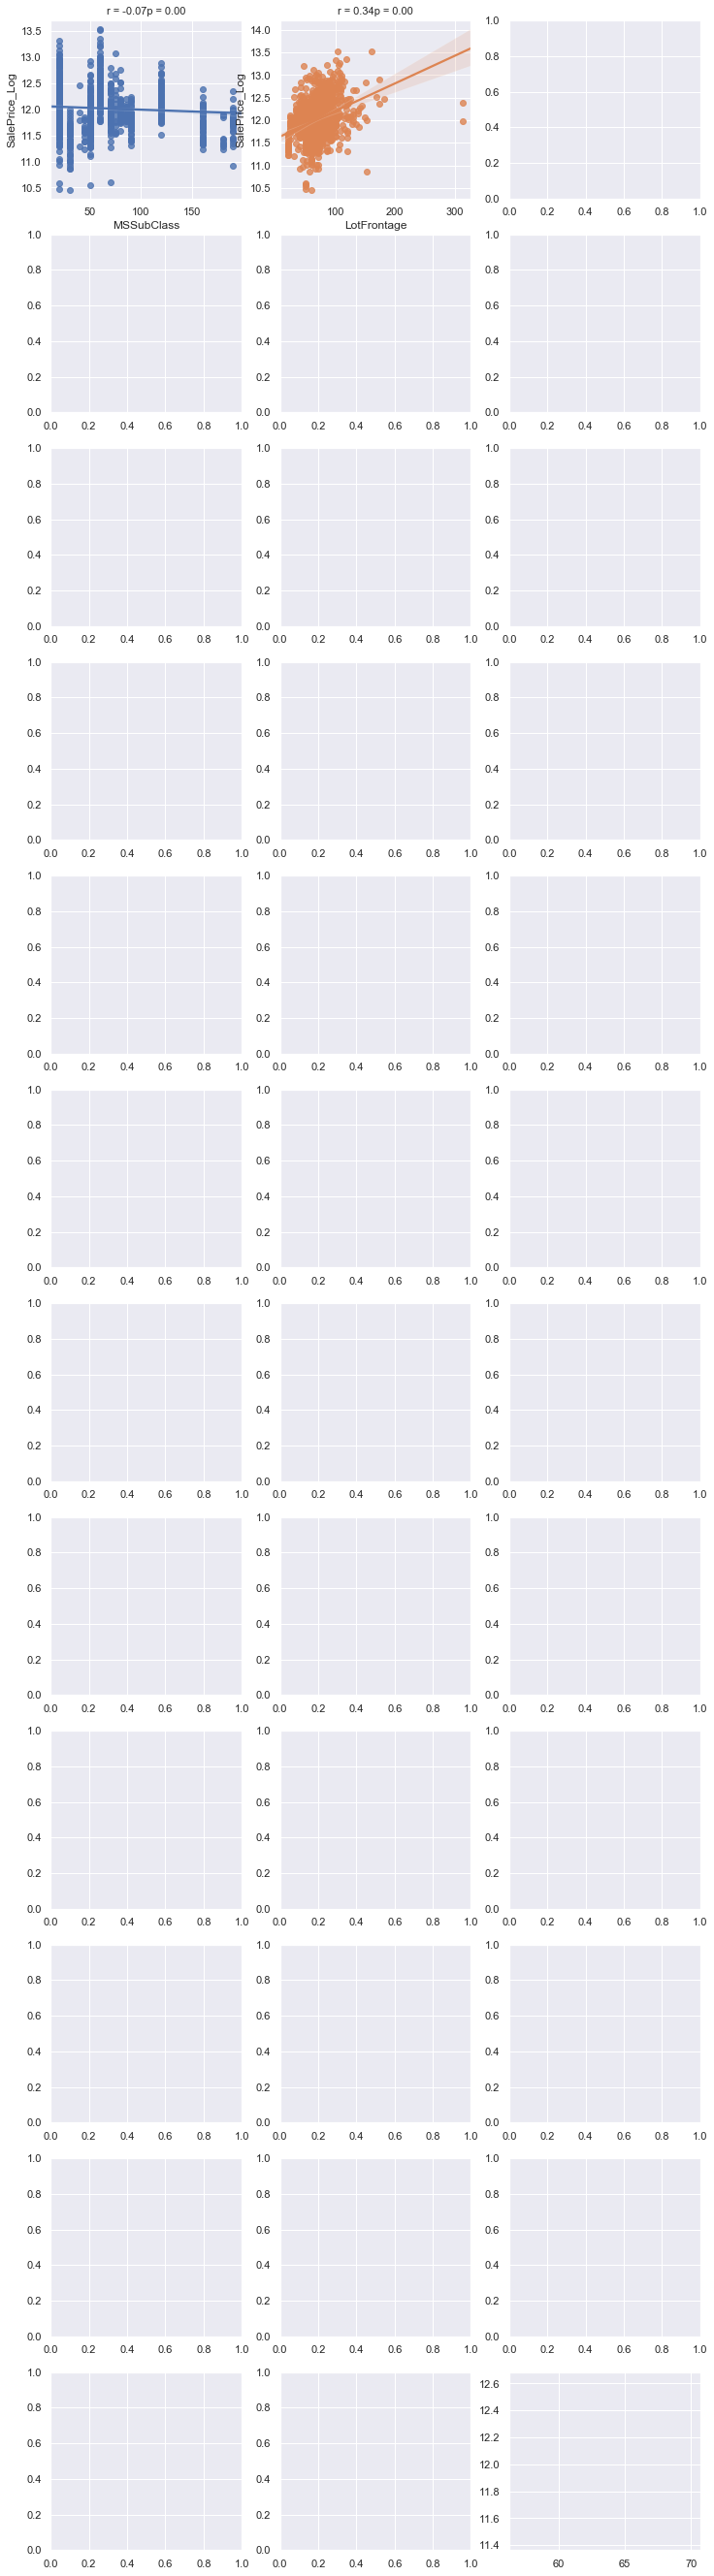

In [213]:
cols=3;rows=12;
figure,axis = plt.subplots(rows,cols,figsize=(cols*4,rows*4))

features = list(num)
do_not_plot = ['Id','SalePrice']
plot = [i for i in features if i not in do_not_plot]

for j in range(0,rows):
    for k in range(0,cols):
        i=j*cols+k
        if i < len(plot):
            sns.regplot(train[plot[i]],train[target],ax=axis[j][k])
            step = stats.pearsonr(train[plot[i]],train[target])
            title = "r = "+"{0:.2f}".format(step[0])+"p = "+"{0:.2f}".format(step[1])
            axis[j][k].set_title(title,fontsize=11)
            
plt.tight_layout()
plt.show()

In [214]:
train=train.drop(train[(train['OverallQual']==10)&(train['SalePrice_Log']<12)].index)

In [215]:
train=train.drop(train[(train['GrLivArea_Log']>8)&(train['SalePrice_Log']<12)].index)

In [216]:
# need columns with a strong correlation to target

In [217]:
corr = train.corr()
c_abs = corr.abs()

cols=len(num)
ser_c=c_abs.nlargest(cols,target)[target]

above_limit = list(ser_c[ser_c.values > min_].index)
below_limit = list(ser_c[ser_c.values <= min_].index)

In [218]:
print(ser_c)

SalePrice_Log    1.000000
OverallQual      0.819626
GrLivArea_Log    0.734812
GarageCars       0.680672
GarageArea       0.655609
TotalBsmtSF      0.642890
1stFlrSF         0.615479
FullBath         0.594956
YearBuilt        0.586956
YearRemodAdd     0.565933
TotRmsAbvGrd     0.536760
GarageYrBlt      0.500797
Fireplaces       0.492031
MasVnrArea       0.431987
LotArea_Log      0.402157
BsmtFinSF1       0.390652
LotFrontage      0.351942
WoodDeckSF       0.334308
OpenPorchSF      0.322837
2ndFlrSF         0.319608
HalfBath         0.314232
BsmtFullBath     0.237189
BsmtUnfSF        0.221974
BedroomAbvGr     0.209058
EnclosedPorch    0.149083
KitchenAbvGr     0.147566
ScreenPorch      0.121192
PoolArea         0.074325
MSSubClass       0.073954
MoSold           0.057267
3SsnPorch        0.054892
LowQualFinSF     0.037972
YrSold           0.037254
OverallCond      0.036908
MiscVal          0.020027
Id               0.017858
BsmtHalfBath     0.005166
BsmtFinSF2       0.004812
Name: SalePr

In [219]:
print("above limit: ", above_limit)
print("below limit: ", below_limit)

above limit:  ['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotArea_Log']
below limit:  ['BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'EnclosedPorch', 'KitchenAbvGr', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'MoSold', '3SsnPorch', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MiscVal', 'Id', 'BsmtHalfBath', 'BsmtFinSF2']


In [220]:
for i in list(cat):
    print(train[i].value_counts())
    print('-'*50)

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
--------------------------------------------------
Pave    1453
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------
None    1368
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------------------------------
Reg    925
IR1    484
IR2     41
IR3      9
Name: LotShape, dtype: int64
--------------------------------------------------
Lvl    1311
Bnk      62
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------
AllPub    1458
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------
Inside     1052
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------
Gtl    1381
Mod      65
Sev      13
Name: LandSlope, dtype: int64
---------------------------

In [221]:
# categorical correlation to SalePrice

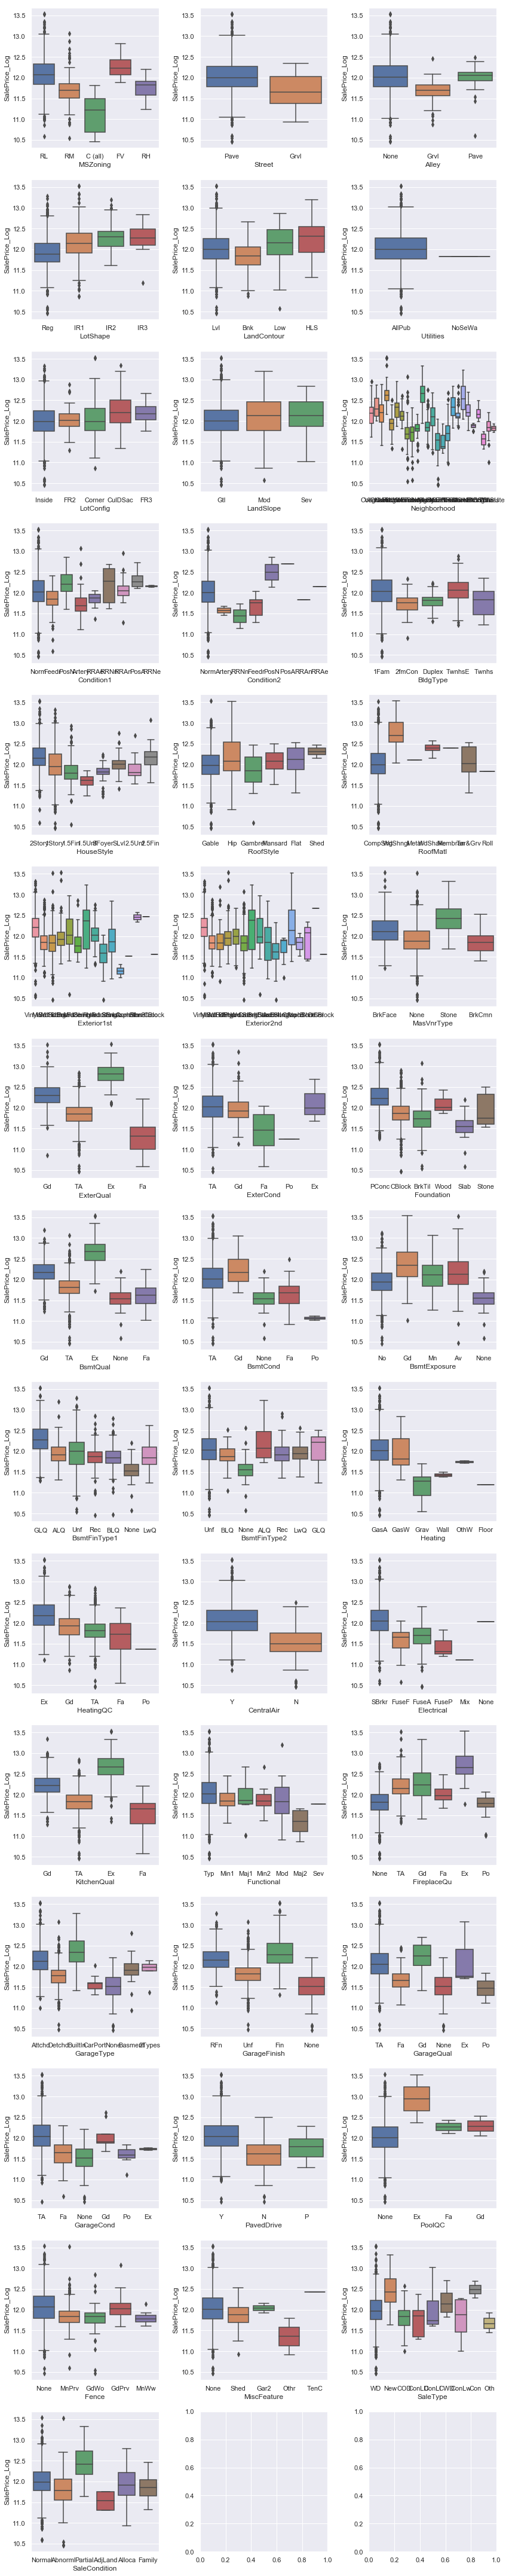

In [222]:
list_cat=list(cat)
rows=15
cols=3

fig,axs=plt.subplots(rows,cols,figsize=(cols*4,rows*4))

for j in range(0,rows):
    for k in range(0,cols):
        i = j*cols+k
        if i<len(list_cat):
            sns.boxplot(x=list_cat[i],y=target,data=train,ax=axs[j][k])
            
plt.tight_layout()
plt.show()

In [223]:
weak=['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]
strong=[ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

In [224]:
#heatmap

In [225]:
quantity=len(above_limit)

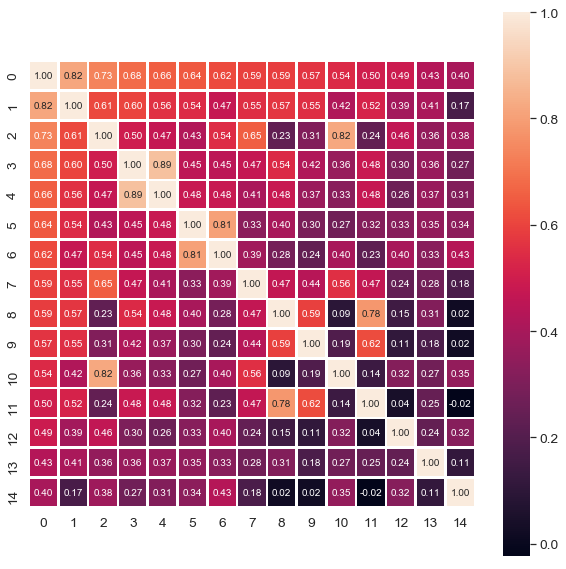

In [226]:
plt.figure(figsize=(quantity/1.5, quantity/1.5))
sns.set(font_scale=1.25)
sns.heatmap(np.corrcoef(train[corr.abs().nlargest(quantity,target)[target].index].values.T), linewidths=1.5, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10})
plt.show()

In [227]:
test_id = test['Id']

drop_num = below_limit
drop_cat = weak

to_drop = ['Id'] + drop_num + drop_cat

for i in [train,test]:
    i.drop(to_drop,inplace=True,axis=1)

In [228]:
cat_list = strong.copy()
cat_list.remove('Neighborhood')

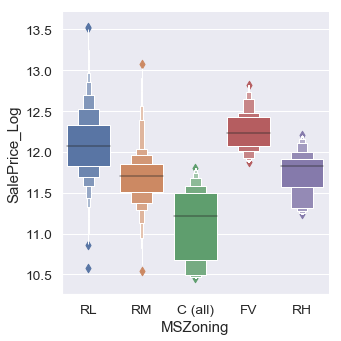

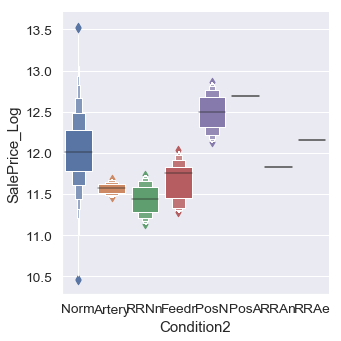

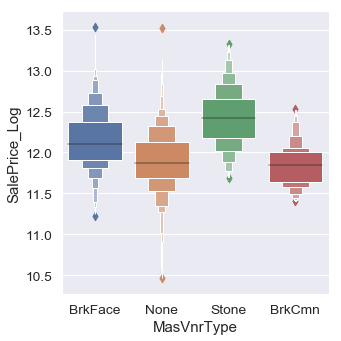

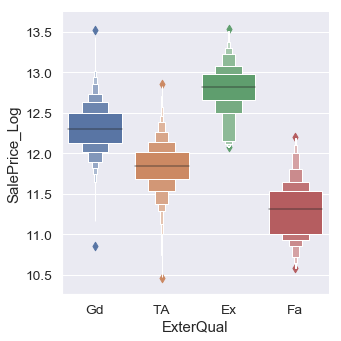

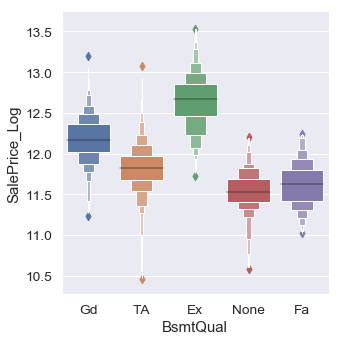

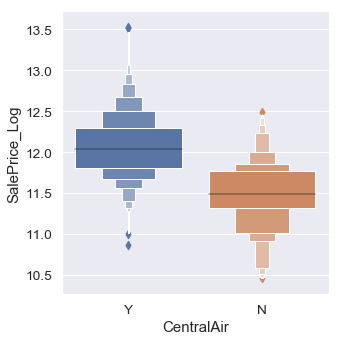

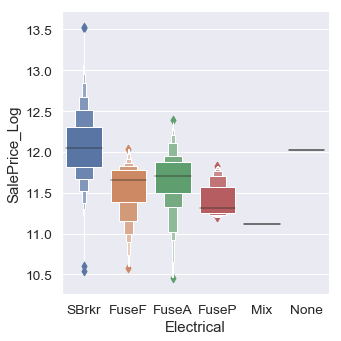

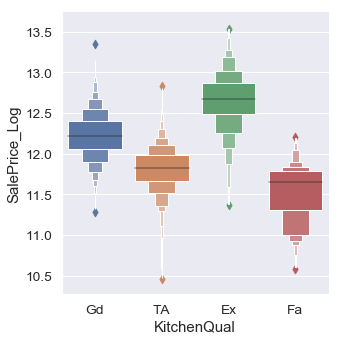

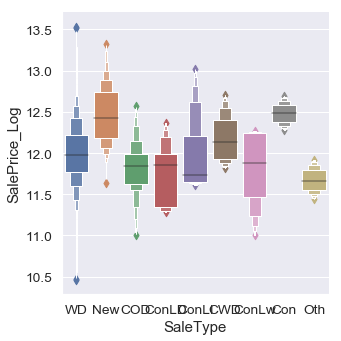

In [229]:
for i in cat_list:
    sns.catplot(x=i,y=target,data=train,kind='boxen')
    plt.show()

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


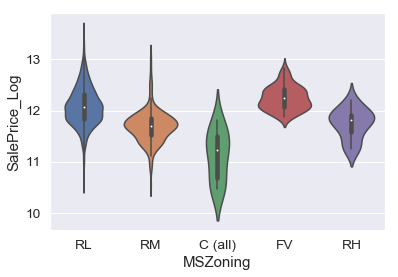

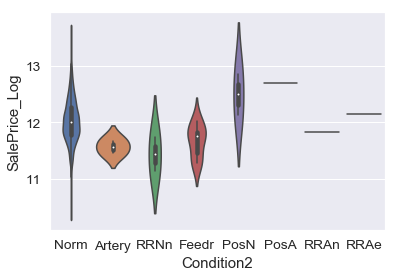

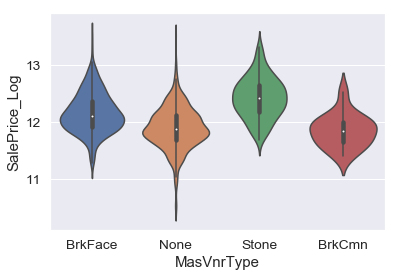

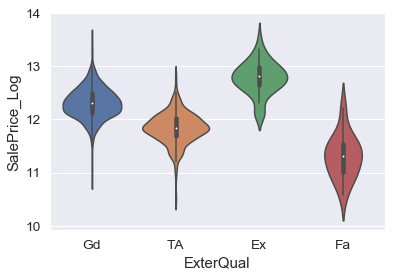

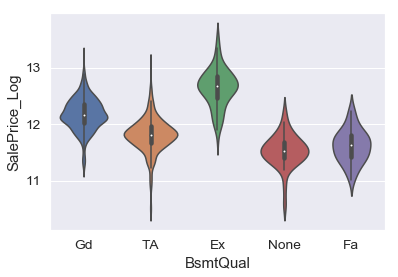

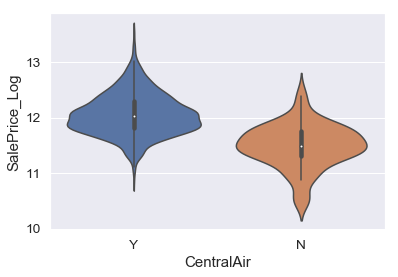

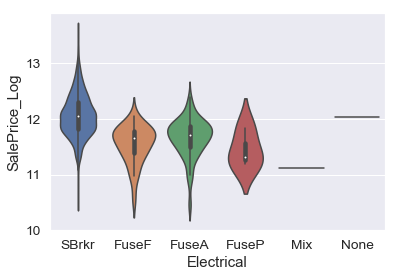

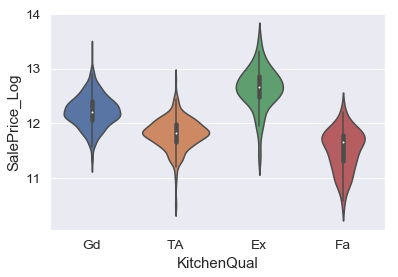

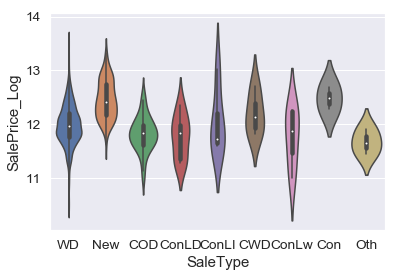

In [230]:
for i in cat_list:
    sns.violinplot(x=i,y=target,data=train)
    plt.show()

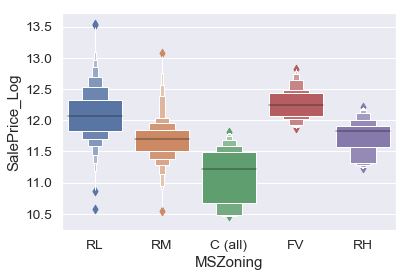

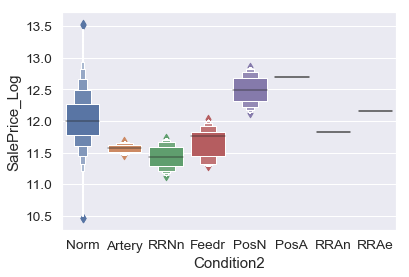

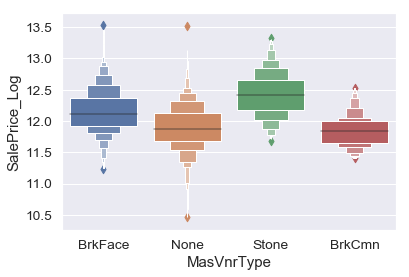

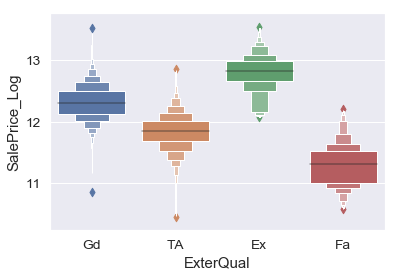

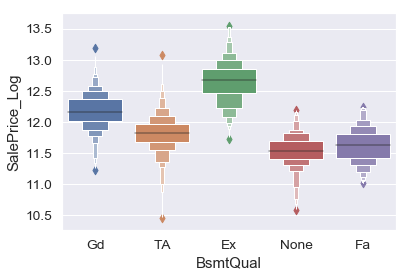

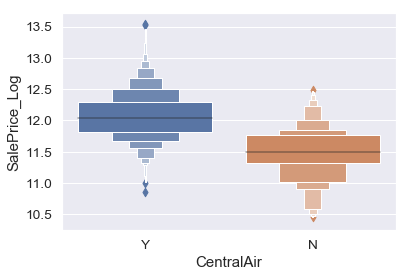

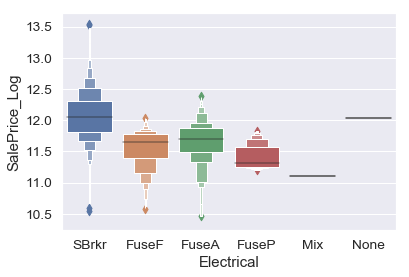

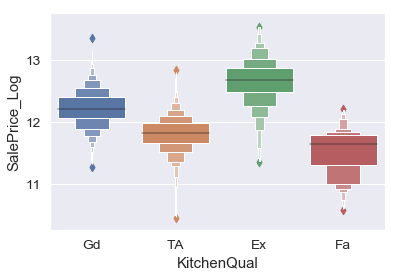

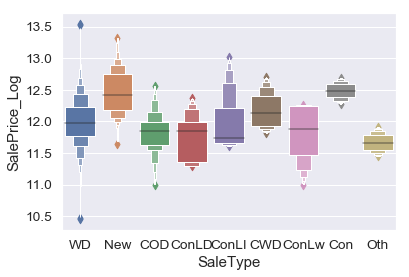

In [231]:
for i in cat_list:
    sns.boxenplot(x=i,y=target,data=train)
    plt.show()

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


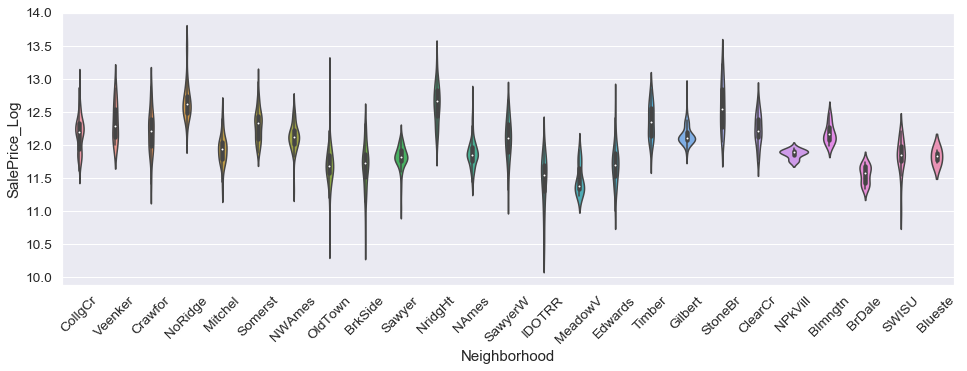

In [232]:
fig, ax=plt.subplots()
fig.set_size_inches(16,5)

sns.violinplot(x='Neighborhood',y=target,data=train,ax=ax)
plt.xticks(rotation=45)
plt.show()

In [233]:
for i in cat_list:
    j = train.groupby(i)[target].mean()
    print(j)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085975
RM         11.692893
Name: SalePrice_Log, dtype: float64
Condition2
Artery    11.570036
Feedr     11.670631
Norm      12.025925
PosA      12.691580
PosN      12.493879
RRAe      12.154779
RRAn      11.827043
RRNn      11.435329
Name: SalePrice_Log, dtype: float64
MasVnrType
BrkCmn     11.853239
BrkFace    12.163630
None       11.896884
Stone      12.428620
Name: SalePrice_Log, dtype: float64
ExterQual
Ex    12.779360
Fa    11.304541
Gd    12.311282
TA    11.837985
Name: SalePrice_Log, dtype: float64
BsmtQual
Ex      12.645873
Fa      11.617600
Gd      12.179882
None    11.529680
TA      11.810855
Name: SalePrice_Log, dtype: float64
CentralAir
N    11.491858
Y    12.061147
Name: SalePrice_Log, dtype: float64
Electrical
FuseA    11.660315
FuseF    11.539624
FuseP    11.446808
Mix      11.112448
None     12.028739
SBrkr    12.061523
Name: SalePrice_Log, dtype: float64
KitchenQual
Ex    12.640186
F

In [234]:
# MSZoning

mszoning_category2 = ['RM','RH']
mszoning_category3 = ['RL','FV']

# Neighbourhood

neighbourhood_category2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
neighbourhood_category3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2

condition2_category2 = ['Norm', 'RRAe']
condition2_category3 = ['PosA', 'PosN']

# SaleType

saletype_category1 = ['Oth']
saletype_category3 = ['CWD']
saletype_category4 = ['New','Con']

In [235]:
for df in [train, test]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(mszoning_category2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(mszoning_category3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(neighbourhood_category2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(neighbourhood_category3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(condition2_category2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(condition2_category3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(saletype_category1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(saletype_category3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(saletype_category4) ), 'SlTy_num'] = 4  

C:\Users\ghani\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


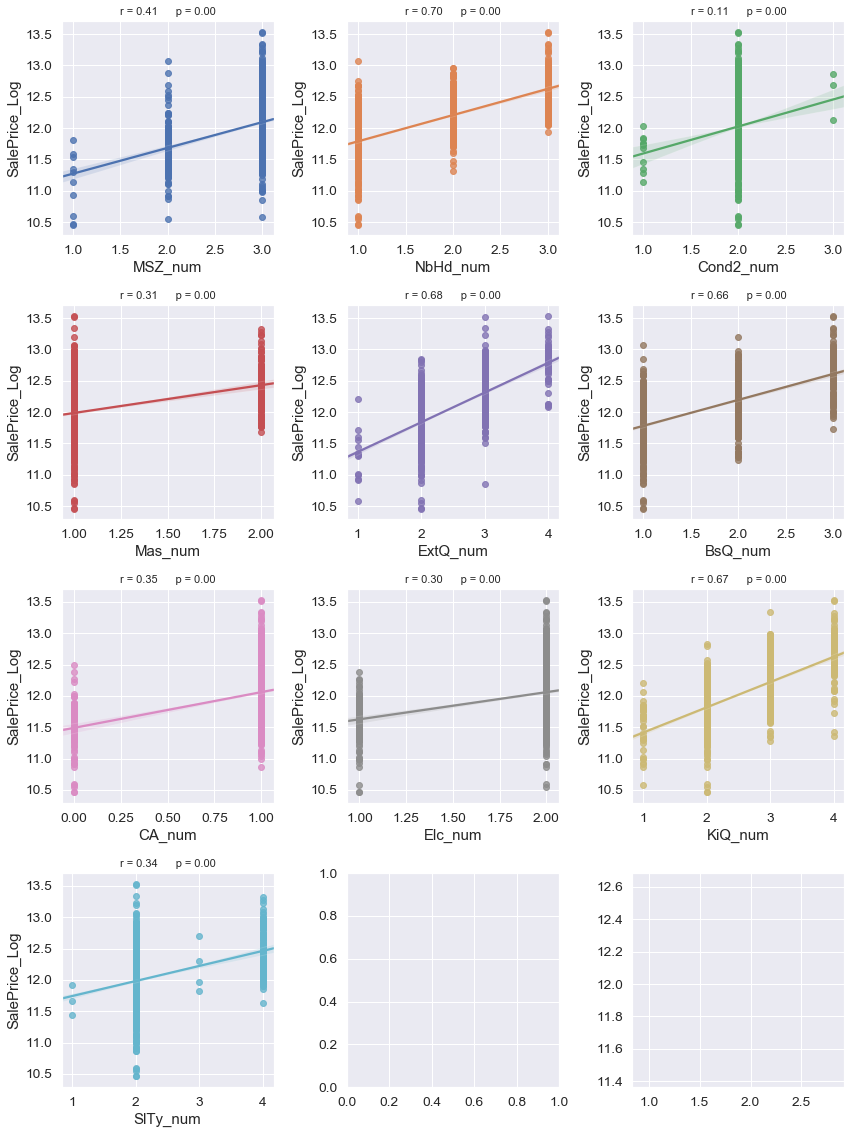

In [236]:
new_cols = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

rows=4
cols=3

fig,axs=plt.subplots(rows,cols,figsize=(cols*4,rows*4))

for j in range(0,rows):
    for k in range(0,cols):
        i = j*cols+k
        if i<len(new_cols):
            sns.regplot(train[new_cols[i]],train[target], ax=axs[j][k])
            step = stats.pearsonr(train[new_cols[i]],train[target])
            title = "r = " + "{0:.2f}".format(step[0]) + "      " "p = " + "{0:.2f}".format(step[1])
            axs[j][k].set_title(title,fontsize=11)
            
plt.tight_layout()
plt.show()

In [237]:
to_drop=['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1=train.corr()
corr_abs1=corr1.abs()

all_cols=len(train)
s_corr1=corr_abs1.nlargest(all_cols,target)[target]

print(s_corr1)
below_limit1=list(s_corr1[s_corr1.values<=min_].index)

for df in [train,test]:
    df.drop(to_drop,inplace=True,axis=1)
    df.drop(below_limit1,inplace=True,axis=1)

SalePrice_Log    1.000000
OverallQual      0.819626
GrLivArea_Log    0.734812
NbHd_num         0.696628
ExtQ_num         0.680864
GarageCars       0.680672
KiQ_num          0.669209
BsQ_num          0.660549
GarageArea       0.655609
TotalBsmtSF      0.642890
1stFlrSF         0.615479
FullBath         0.594956
YearBuilt        0.586956
YearRemodAdd     0.565933
TotRmsAbvGrd     0.536760
GarageYrBlt      0.500797
Fireplaces       0.492031
MasVnrArea       0.431987
MSZ_num          0.409464
LotArea_Log      0.402157
CA_num           0.351628
SlTy_num         0.336797
Mas_num          0.312715
Elc_num          0.304894
Cond2_num        0.105446
Name: SalePrice_Log, dtype: float64


In [239]:
corr2=train.corr()
c_abs2=corr2.abs()

all_cols=len(train)
s_corr2=c_abs2.nlargest(all_cols,target)[target]

print(s_corr2)

SalePrice_Log    1.000000
OverallQual      0.819626
GrLivArea_Log    0.734812
NbHd_num         0.696628
ExtQ_num         0.680864
GarageCars       0.680672
KiQ_num          0.669209
BsQ_num          0.660549
GarageArea       0.655609
TotalBsmtSF      0.642890
1stFlrSF         0.615479
FullBath         0.594956
YearBuilt        0.586956
YearRemodAdd     0.565933
TotRmsAbvGrd     0.536760
GarageYrBlt      0.500797
Fireplaces       0.492031
MasVnrArea       0.431987
MSZ_num          0.409464
LotArea_Log      0.402157
Name: SalePrice_Log, dtype: float64


In [240]:
train.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,7,2003,2003,196.0,856,856,2,8,0,...,2,548,12.247694,7.444249,9.041922,3,2,3,2,3
1,RL,6,1976,1976,0.0,1262,1262,2,6,1,...,2,460,12.109011,7.140453,9.169518,3,2,2,2,2
2,RL,7,2001,2002,162.0,920,920,2,6,1,...,2,608,12.317167,7.487734,9.328123,3,2,3,2,3
3,RL,7,1915,1970,0.0,756,961,1,7,1,...,3,642,11.849398,7.448334,9.164296,3,2,2,1,3
4,RL,8,2000,2000,350.0,1145,1145,2,9,1,...,3,836,12.429216,7.695303,9.565214,3,3,3,2,3


In [241]:
test.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RH,5,1961,1961,0.0,882.0,896,1,5,0,1961.0,1.0,730.0,6.797940,9.360655,2,1,2,1,2
1,RL,6,1958,1958,108.0,1329.0,1329,1,6,0,1958.0,1.0,312.0,7.192182,9.565704,3,1,2,1,3
2,RL,5,1997,1998,0.0,928.0,928,2,6,1,1997.0,2.0,482.0,7.395722,9.534595,3,2,2,2,2
3,RL,6,1998,1998,20.0,926.0,926,2,7,1,1998.0,2.0,470.0,7.380256,9.208138,3,2,2,1,3
4,RL,8,1992,1992,0.0,1280.0,1280,2,5,0,1992.0,2.0,506.0,7.154615,8.518193,3,3,3,2,3


In [242]:
corr=train.corr()
c_abs=corr.abs()

all_cols=len(train)
print(c_abs.nlargest(all_cols,target)[target])

SalePrice_Log    1.000000
OverallQual      0.819626
GrLivArea_Log    0.734812
NbHd_num         0.696628
ExtQ_num         0.680864
GarageCars       0.680672
KiQ_num          0.669209
BsQ_num          0.660549
GarageArea       0.655609
TotalBsmtSF      0.642890
1stFlrSF         0.615479
FullBath         0.594956
YearBuilt        0.586956
YearRemodAdd     0.565933
TotRmsAbvGrd     0.536760
GarageYrBlt      0.500797
Fireplaces       0.492031
MasVnrArea       0.431987
MSZ_num          0.409464
LotArea_Log      0.402157
Name: SalePrice_Log, dtype: float64


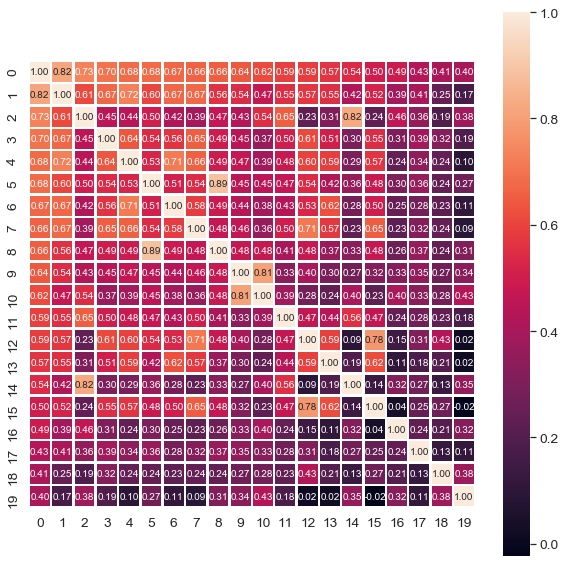

In [243]:
features2=len(train.columns)
plt.figure(figsize=(quantity/1.5, quantity/1.5))
sns.set(font_scale=1.25)
sns.heatmap(np.corrcoef(train[corr.abs().nlargest(features2,target)[target].index].values.T), linewidths=1.5, annot=True, square=True, 
            fmt='.2f', annot_kws={'size': 10})
plt.show()

In [247]:
cols = c_abs.nlargest(all_cols, target)[target].index
cols = list(cols)

if drop == 1 :
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols: 
            cols.remove(col)
            
cols=list(cols)
print(cols)

['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [248]:
features3=cols.copy()
features3.remove('SalePrice_Log')

print(features3)

['OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [249]:
train_ml=train[features3].copy()
test_ml=test[features3].copy()

y=train[target]